In [74]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timezone
from collections import Counter

# Parameters
article = "Cookie"
start_date = datetime(2022, 6, 1, tzinfo=timezone.utc)
end_date = datetime(2023, 6, 30, tzinfo=timezone.utc)

print(f"\nArticle: {article}")
print(f"Period: {start_date.strftime('%b %Y')} to {end_date.strftime('%b %Y')}")

headers = {'User-Agent': 'EditTracker/1.0'}
params = {
    'action': 'query',
    'prop': 'revisions',
    'titles': article,
    'rvlimit': 500,
    'rvprop': 'timestamp',
    'format': 'json'
}


Article: Cookie
Period: Jun 2022 to Jun 2023


In [75]:
print("\nFetching data from Wikipedia API...")
response = requests.get('https://en.wikipedia.org/w/api.php', params=params, headers=headers, timeout=30)
data = response.json()

# Extract timestamps
timestamps = []
pages = data.get('query', {}).get('pages', {})

for page_id, page_data in pages.items():
    if 'revisions' in page_data:
        for rev in page_data['revisions']:
            ts_str = rev['timestamp']
            if ts_str.endswith('Z'):
                ts_str = ts_str[:-1]
            ts = datetime.fromisoformat(ts_str + '+00:00')
            ts = ts.replace(tzinfo=timezone.utc)
            timestamps.append(ts)

print(f"Total revisions found: {len(timestamps)}")

# Filter for target period
filtered_timestamps = [ts for ts in timestamps if start_date <= ts <= end_date]
print(f"Edits in target period: {len(filtered_timestamps)}")


Fetching data from Wikipedia API...
Total revisions found: 500
Edits in target period: 28


In [77]:
# Create month labels for the full period
all_months = []
current = start_date.replace(day=1)
while current <= end_date:
    all_months.append(f"{current.year}-{current.month:02d}")
    if current.month == 12:
        current = current.replace(year=current.year + 1, month=1)
    else:
        current = current.replace(month=current.month + 1)

# Count edits per month
monthly_counts = Counter()
for ts in filtered_timestamps:
    month_key = f"{ts.year}-{ts.month:02d}"
    monthly_counts[month_key] += 1


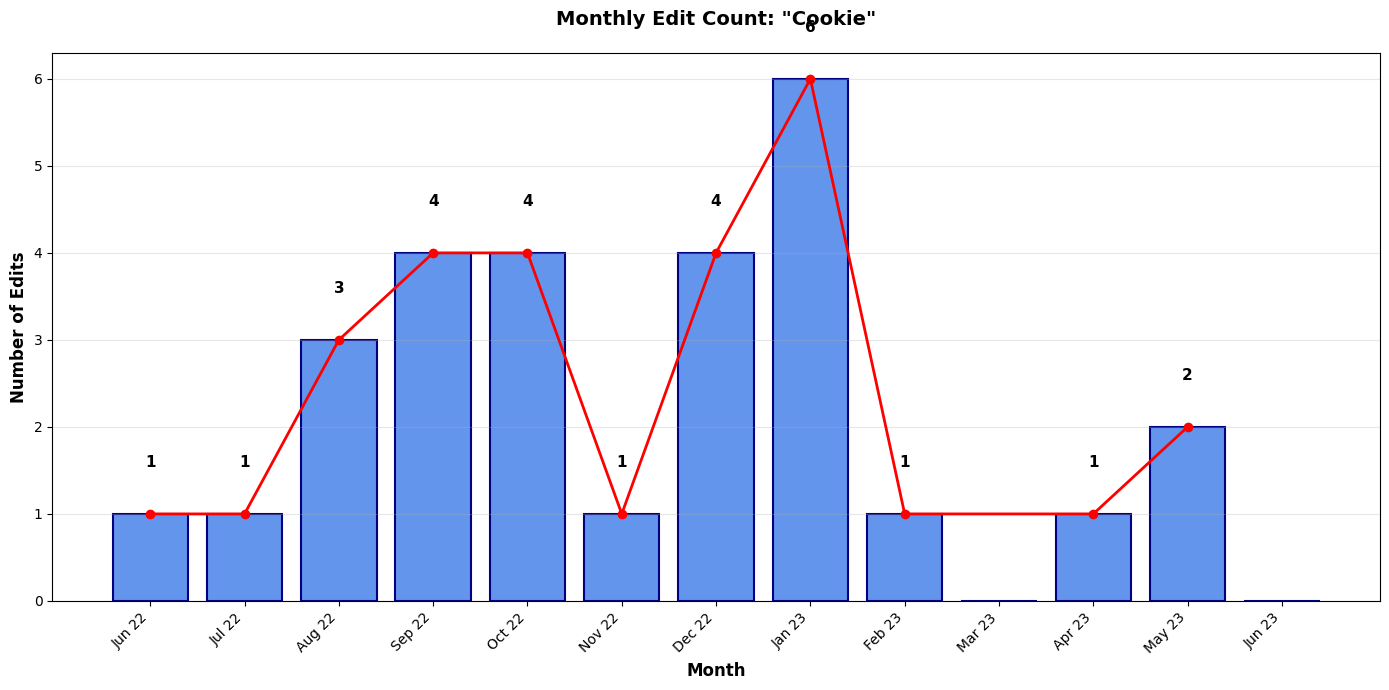

In [79]:
# Create the plot
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

labels = []
counts = []
for month_key in all_months:
    year, month = map(int, month_key.split('-'))
    labels.append(f"{month_names[month]} {str(year)[-2:]}")
    counts.append(monthly_counts.get(month_key, 0))

plt.figure(figsize=(14, 7))
bars = plt.bar(labels, counts, color='cornflowerblue', edgecolor='navy', linewidth=1.5)
for bar, count in zip(bars, counts):
    if count > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
nonzero_indices = [i for i, count in enumerate(counts) if count > 0]
x_vals = [i for i in range(len(labels)) if counts[i] > 0]
y_vals = [counts[i] for i in range(len(labels)) if counts[i] > 0]
plt.plot(x_vals, y_vals, 'r-', linewidth=2, marker='o', markersize=6)

plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Edits', fontsize=12, fontweight='bold')
plt.title(f'Monthly Edit Count: "{article}"', fontsize=14, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)

from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

plt.show()

In [80]:
# Print  table
print("\n" + "MONTHLY BREAKDOWN" +"\n")
print(f"{'Month':<10} {'Edits':<8} {'Cumulative':<12}")

cumulative = 0
for label, count in zip(labels, counts):
    cumulative += count
    print(f"{label:<10} {count:<8} {cumulative:<12} {bar}")

print("\n"+f"{'TOTAL':<10} {total_edits:<8}")




MONTHLY BREAKDOWN

Month      Edits    Cumulative  
Jun 22     1        1            Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Jul 22     1        2            Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Aug 22     3        5            Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Sep 22     4        9            Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Oct 22     4        13           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Nov 22     1        14           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Dec 22     4        18           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Jan 23     6        24           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Feb 23     1        25           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Mar 23     0        25           Rectangle(xy=(11.6, 0), width=0.8, height=0, angle=0)
Apr 23     1        26           Rectangle(xy=(11.6, 0), width=0.8, height=0,